# Introduction to Matplotlib

In [1]:
# this helps to display the plot in the notebook; otherwise only the '[]' would have been displayed
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

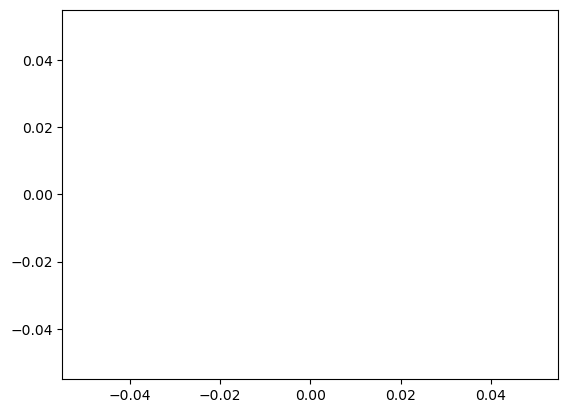

In [2]:
# plt.plot();
# ; to hide the '[]' result

# equivalent

plt.plot()
plt.show()

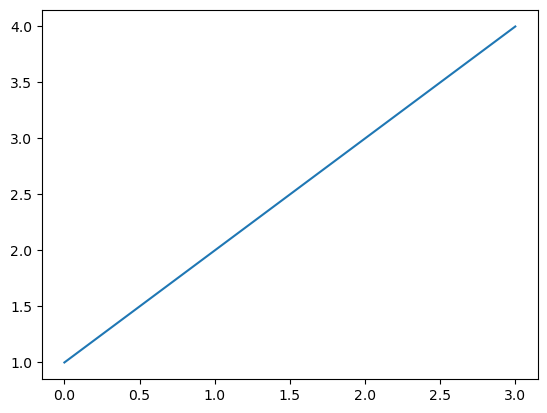

In [3]:
plt.plot([1, 2, 3, 4])
plt.show()

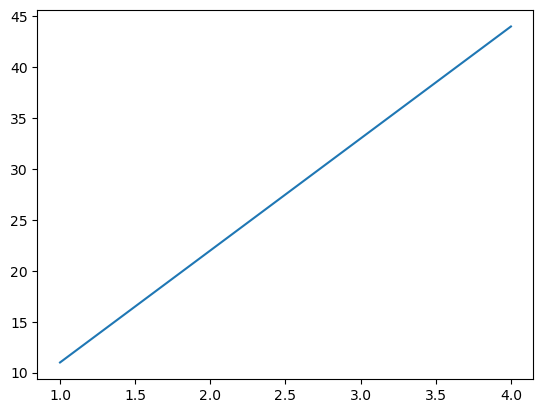

In [4]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)
plt.show()

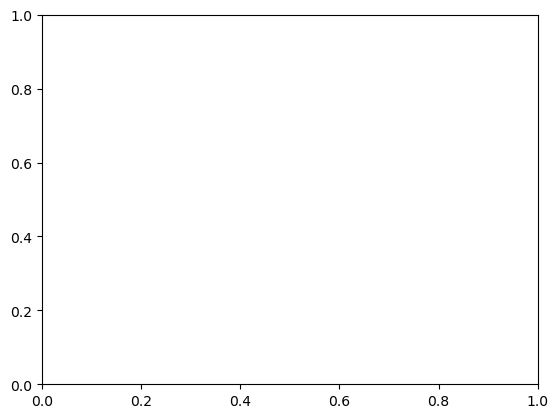

In [5]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

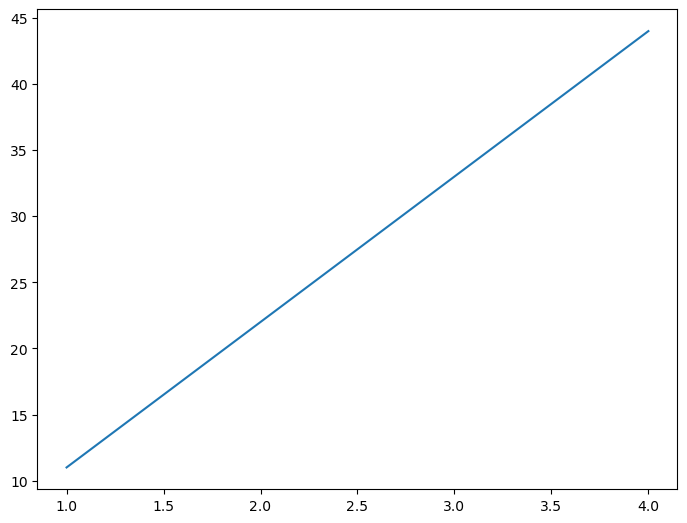

In [6]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1]) # add some data
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

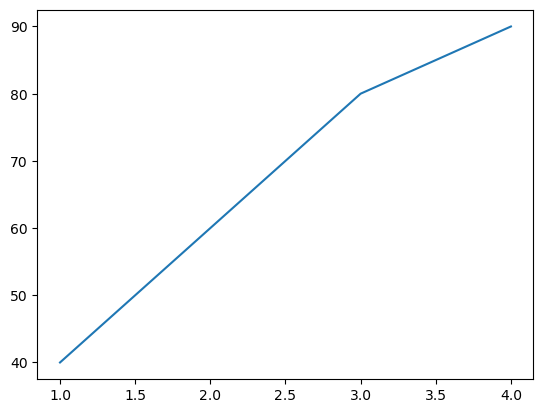

In [7]:
# 3rd method; the one we gonna be using

fig, ax = plt.subplots()
ax.plot(x, [40, 60, 80, 90]); # adds some data
type(fig), type(ax)

## Matplotlib example workflow

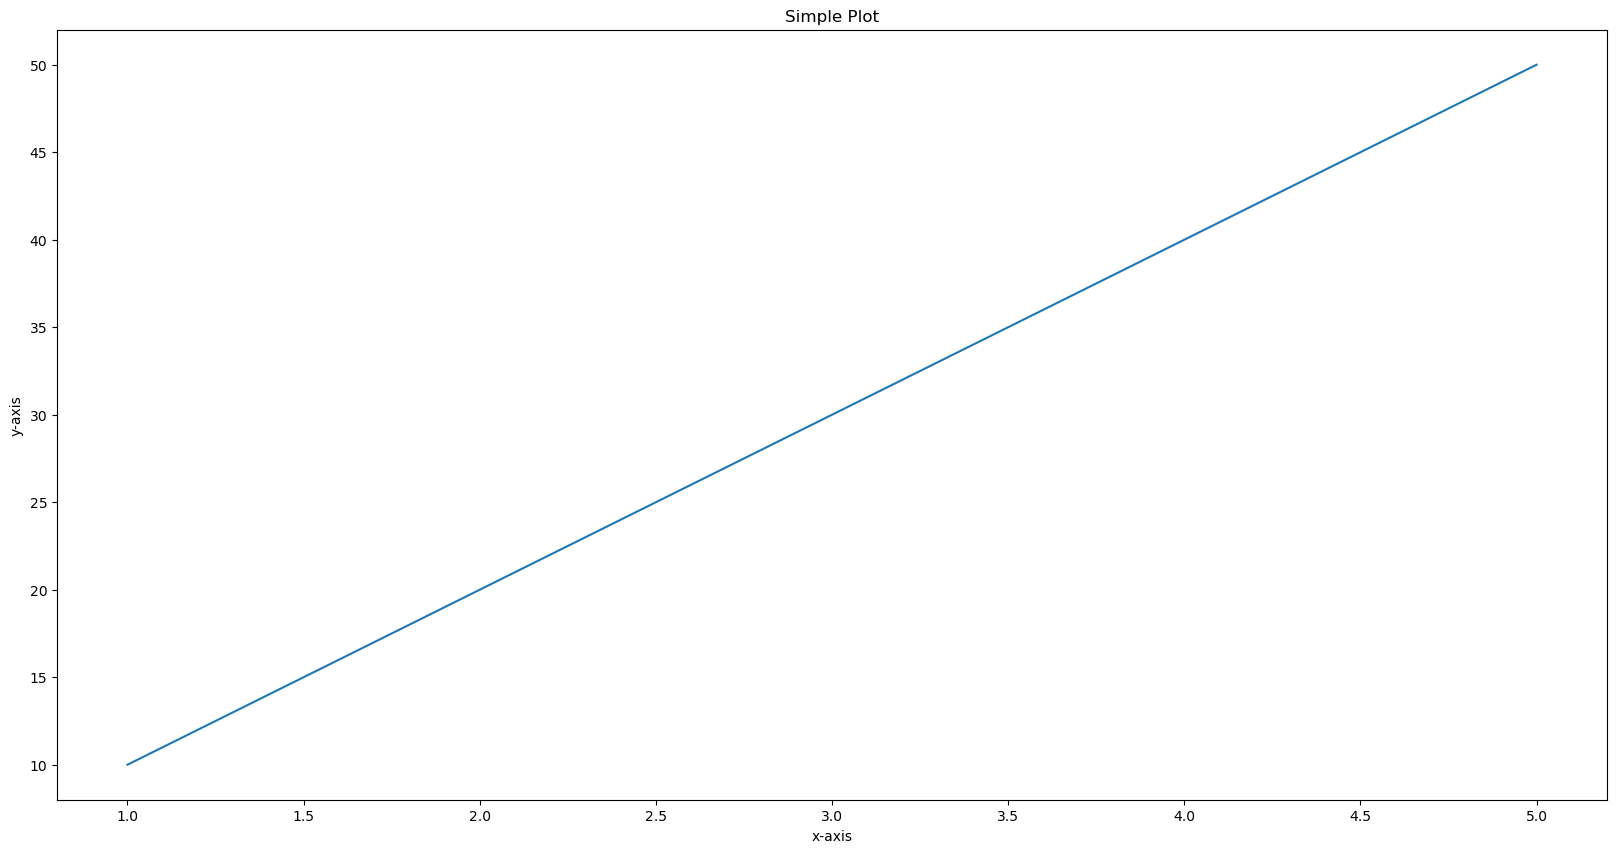

In [8]:
# 1. Import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Prepare data
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# 3. Setup plot
fig, ax = plt.subplots(figsize=(20, 10)) # (width, height)

# 4. Plot data
ax.plot(x, y)

# 5. Customize plot
ax.set(
    title="Simple Plot",
    xlabel="x-axis",
    ylabel="y-axis"
)

# 6. Save & show (you save the whole figure)
fig.savefig("./data/plot-sample.png")



## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
import numpy as np

In [10]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]


array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

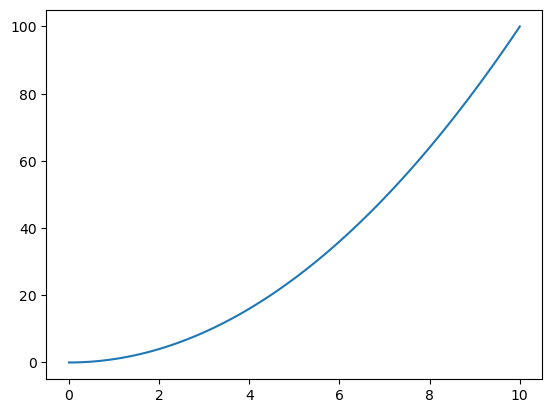

In [11]:
# Plot the data and create a LINE PLOT
fig, ax = plt.subplots()
ax.plot(x, x**2);

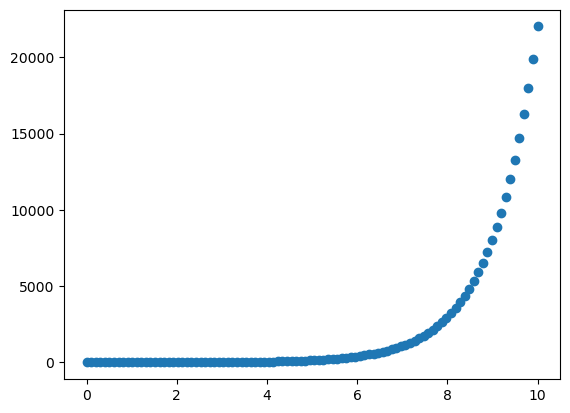

In [12]:
# Use the same data to make a scatter

fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

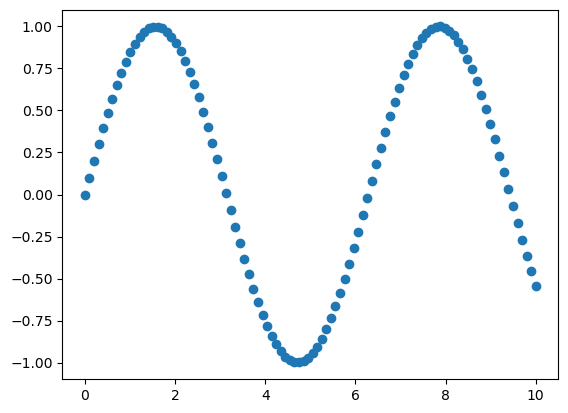

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

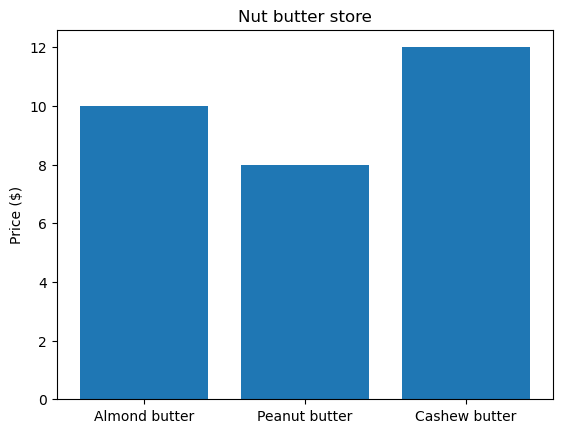

In [14]:
# Make a plot from dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(
    title="Nut butter store",
    ylabel="Price ($)"
);

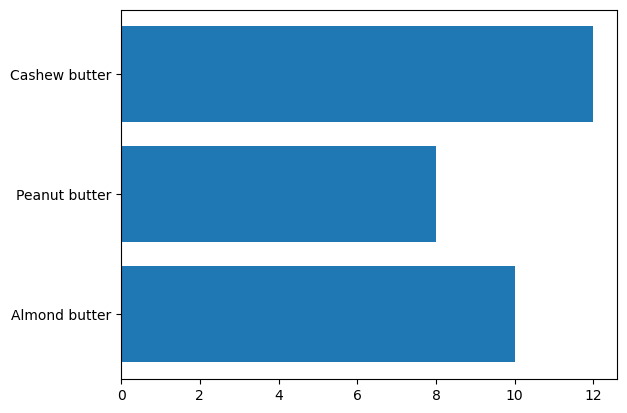

In [15]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

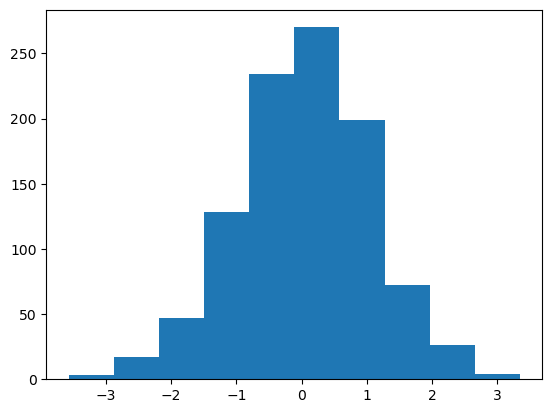

In [16]:
# Make some data for histogram and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

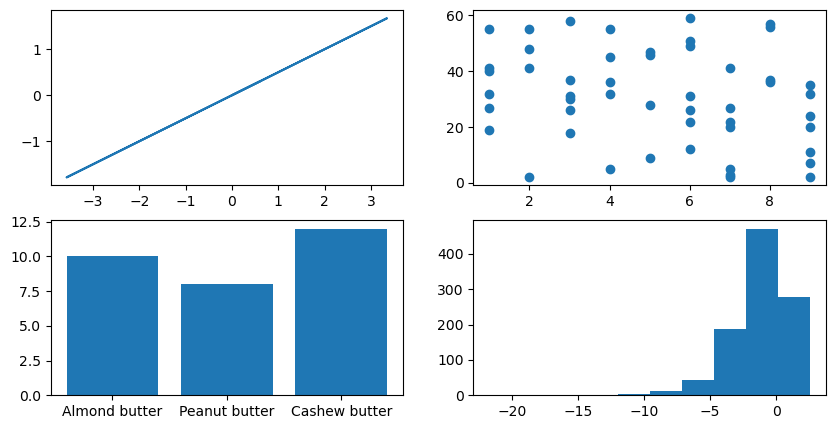

In [17]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax1.plot(x, x/2);
ax2.scatter(np.random.randint(1, 10, 50), np.random.randint(1, 60, 50));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.log(x**2)); 

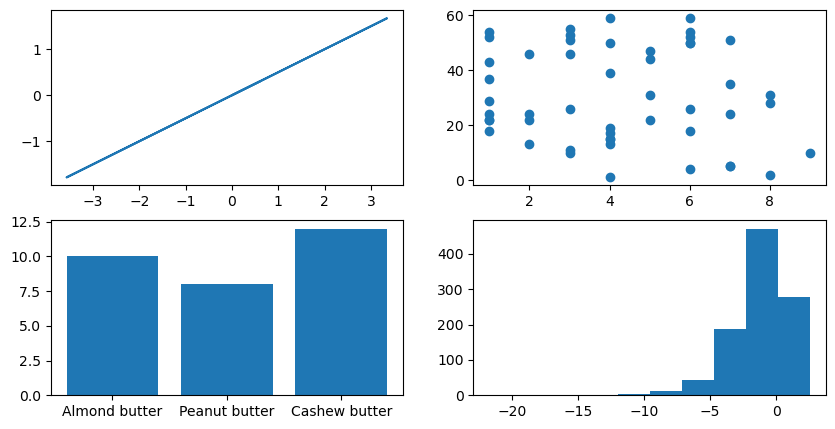

In [18]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.randint(1, 10, 50), np.random.randint(1, 60, 50));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.log(x**2)); 


### Plotting from pandas DataFrames

In [19]:
import pandas as pd

In [20]:
# Make a dataframe

car_sales = pd.read_csv("./data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [21]:
ts = pd.Series(
        np.random.randn(1000),
        index=pd.date_range("1/1/2024", periods=1000)
    )

<Axes: >

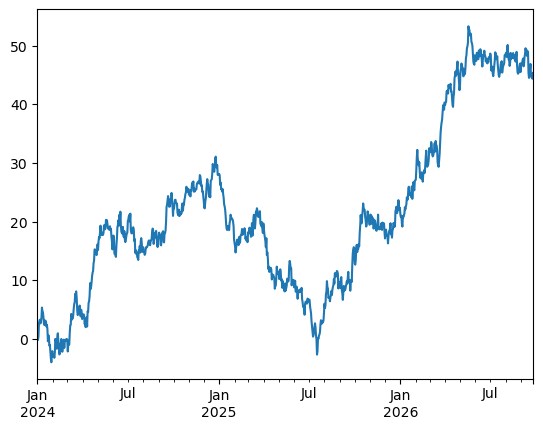

In [22]:
ts = ts.cumsum()
ts.plot()

In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [24]:
car_sales["Price"] = car_sales["Price"].str.replace("[$,.]", '', regex=True).str[:-2]
car_sales["Price"]

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: object

In [25]:
car_sales["Price"] = car_sales["Price"].astype(int)

In [26]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale Date"] = pd.date_range("2024", periods=len(car_sales))

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [29]:
car_sales['Total Sales'] = car_sales["Price"].cumsum()

In [30]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


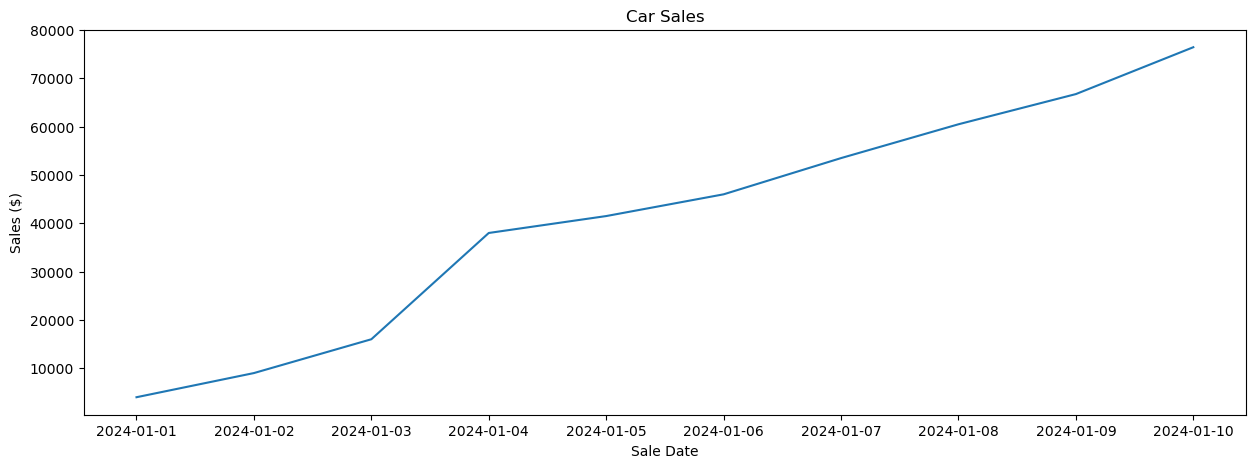

In [31]:
# Let's plot the total sales

# matplot lib version

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(car_sales['Sale Date'], car_sales['Total Sales']);
ax.set(
    title="Car Sales",
    ylabel="Sales ($)",
    xlabel="Sale Date"
);

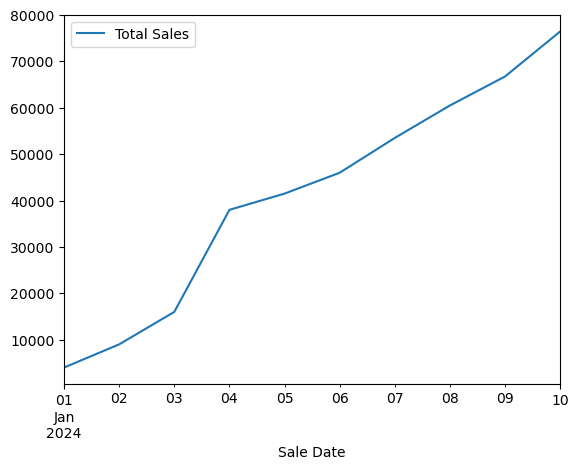

In [32]:

# pandas simplified version

car_sales.plot(x="Sale Date", y="Total Sales");

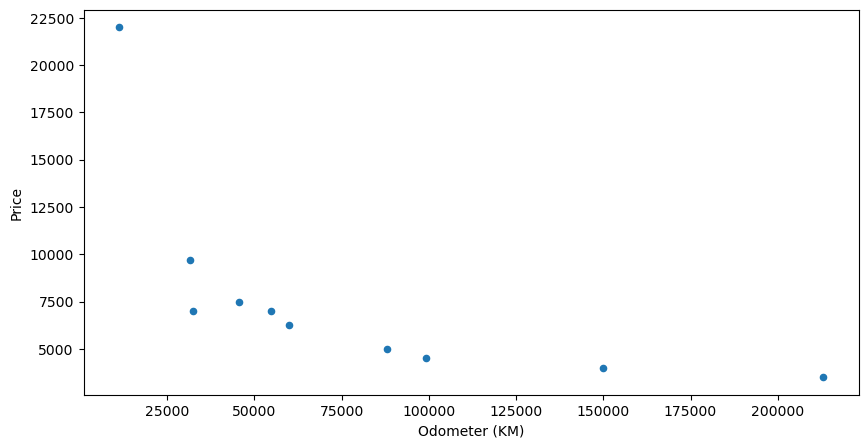

In [33]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter", figsize=(10, 5));

In [34]:
# bar graph
x = np.random.rand(10, 4)
x

# turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.712632,0.582245,0.055998,0.076447
1,0.505775,0.834361,0.366460,0.246100
2,0.098540,0.109156,0.198109,0.482226
3,0.341358,0.119763,0.518181,0.191535
4,0.177741,0.716948,0.342827,0.838833
5,0.041484,0.081685,0.518729,0.986629
6,0.687929,0.922268,0.881920,0.972721
7,0.425130,0.277940,0.525230,0.632548
8,0.085823,0.981654,0.711704,0.367262
9,0.681301,0.985902,0.889369,0.542542


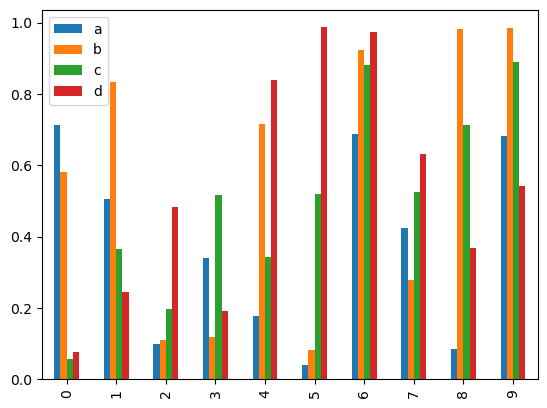

In [35]:
df.plot.bar();

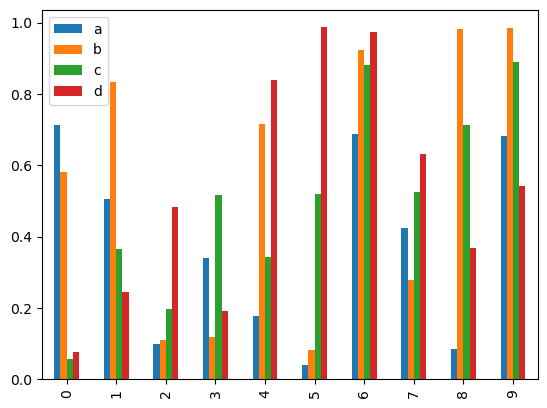

In [36]:
df.plot(kind='bar');

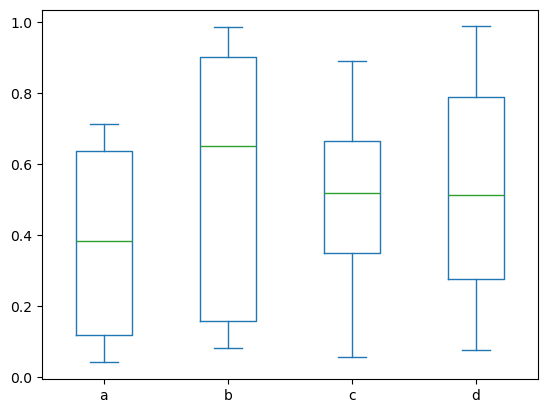

In [37]:
df.plot(kind='box');

In [38]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


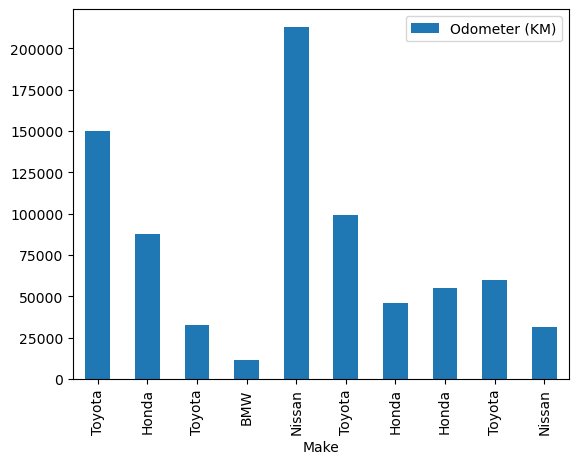

In [39]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

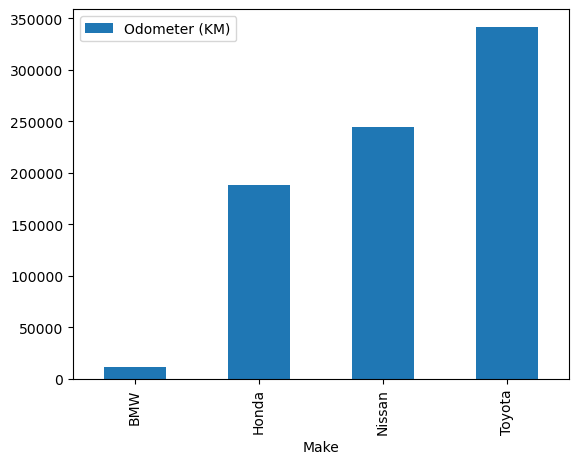

In [40]:
car_sales.filter(['Make', 'Odometer (KM)']).groupby('Make', as_index=False).sum().plot(x="Make", y="Odometer (KM)", kind="bar");

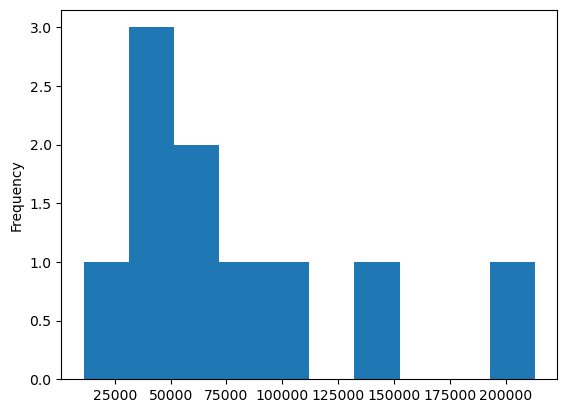

In [41]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist();

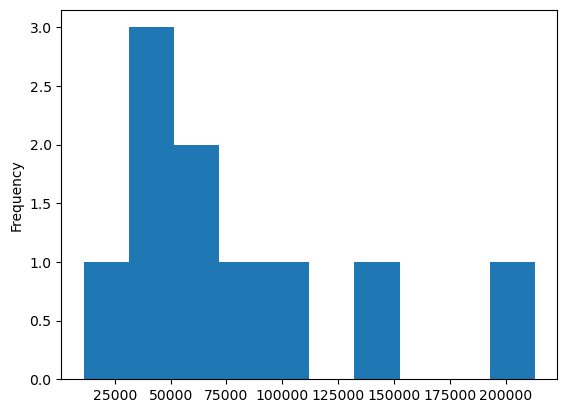

In [42]:
car_sales["Odometer (KM)"].plot(kind="hist"); # <-- use this option, more clear (my recommendation, not his)

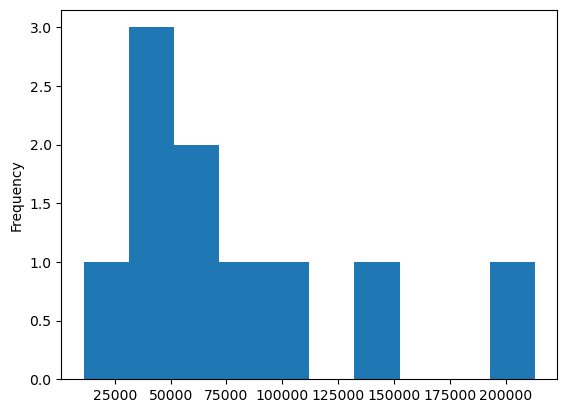

In [43]:
car_sales['Odometer (KM)'].plot.hist(bins=10); # it has to look as much as possible like a curve (normal distribution); only this option accepts bins param

In [44]:
# new data set

heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


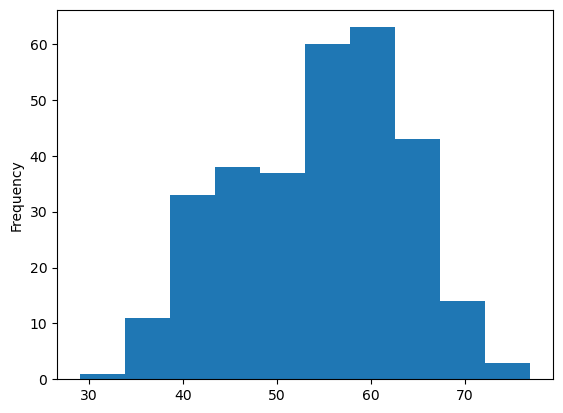

In [45]:
# create a histogram based on age column

heart_disease['age'].plot.hist(bins=10);

In [46]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


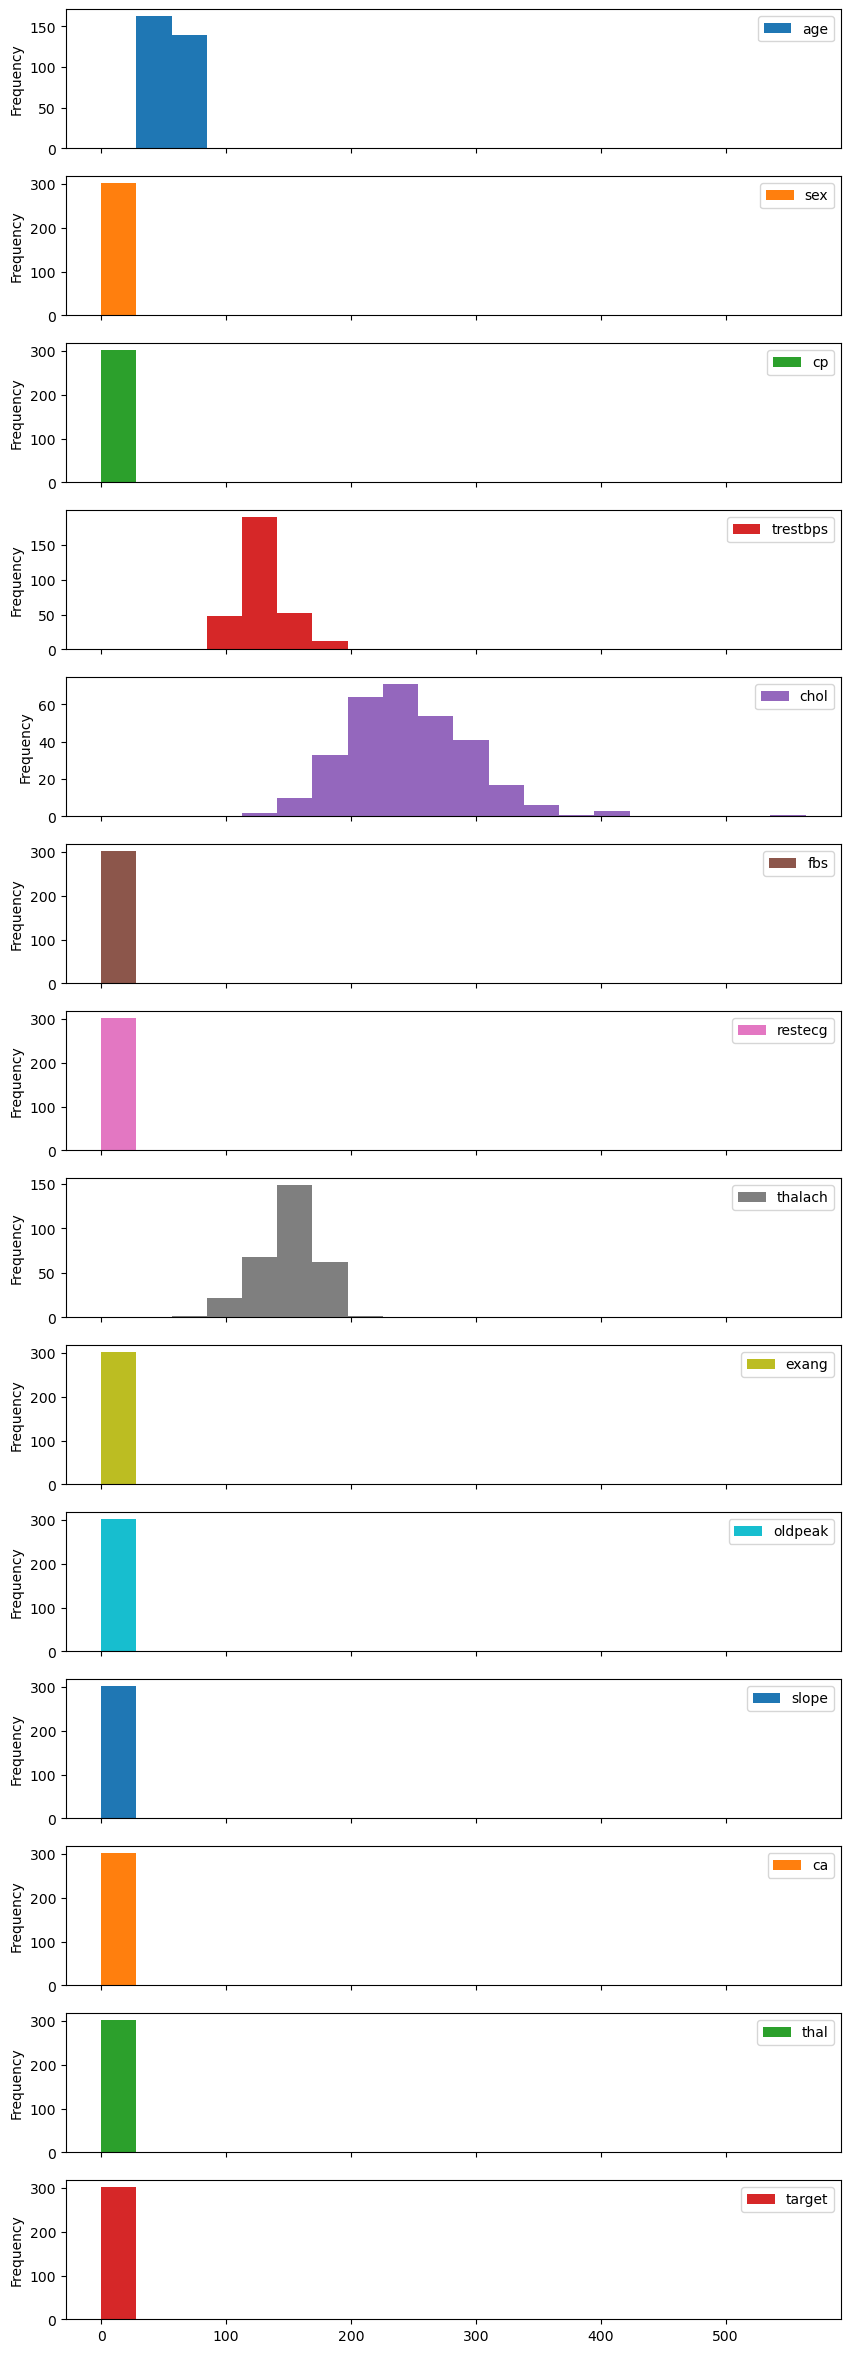

In [47]:
heart_disease.plot.hist(subplots=True, figsize=(10, 30), bins=20);

### Which one we should use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting someting more advances, use the OO method

In [48]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
over_50_patients = heart_disease[heart_disease['age'] > 50]
over_50_patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [50]:
len(over_50_patients)

208

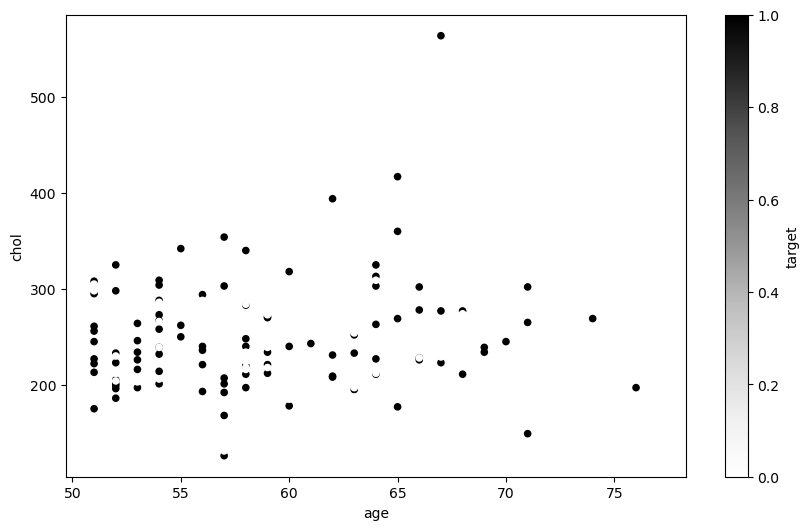

In [51]:
# pyplot method; directly from pandas

over_50_patients.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target",
    figsize=(10, 6)
);

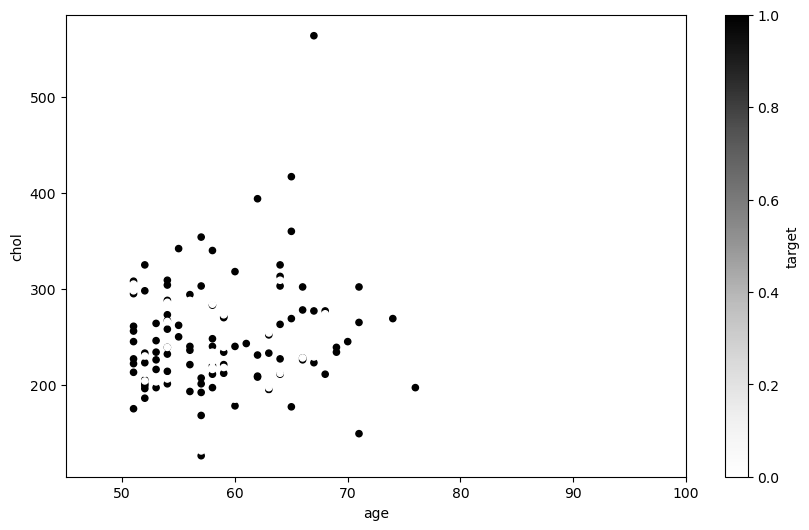

In [52]:
# OO method (mixed with pyplot)

fig, ax = plt.subplots(figsize=(10, 6))
over_50_patients.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target",
    ax=ax
);
ax.set_xlim([45, 100]);

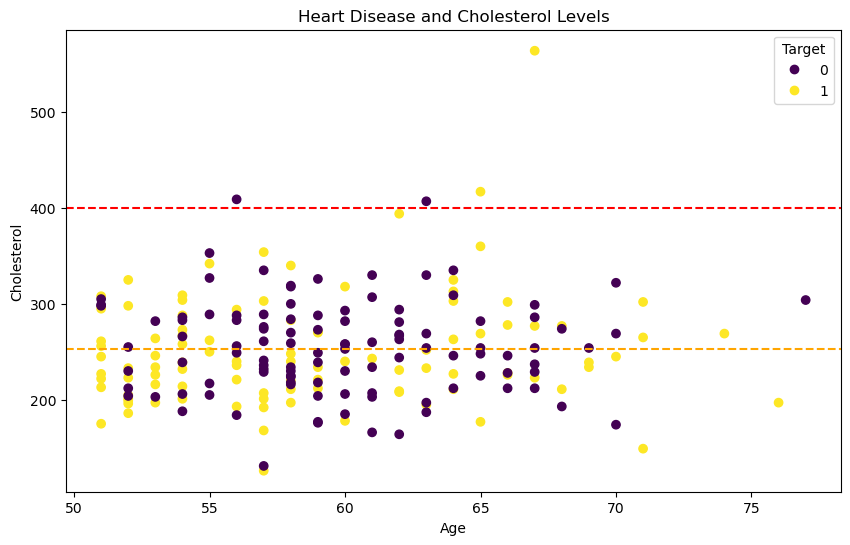

In [53]:
# The real OO Method, from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(
    x=over_50_patients["age"],
    y=over_50_patients["chol"],
    c=over_50_patients["target"]
);

# Customize the plot
ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholesterol"
);

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(
    over_50_patients["chol"].mean(),
    linestyle="--",
    color="orange"
);

ax.axhline(
    400,
    linestyle="--",
    color="red"
);

In [54]:
over_50_patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


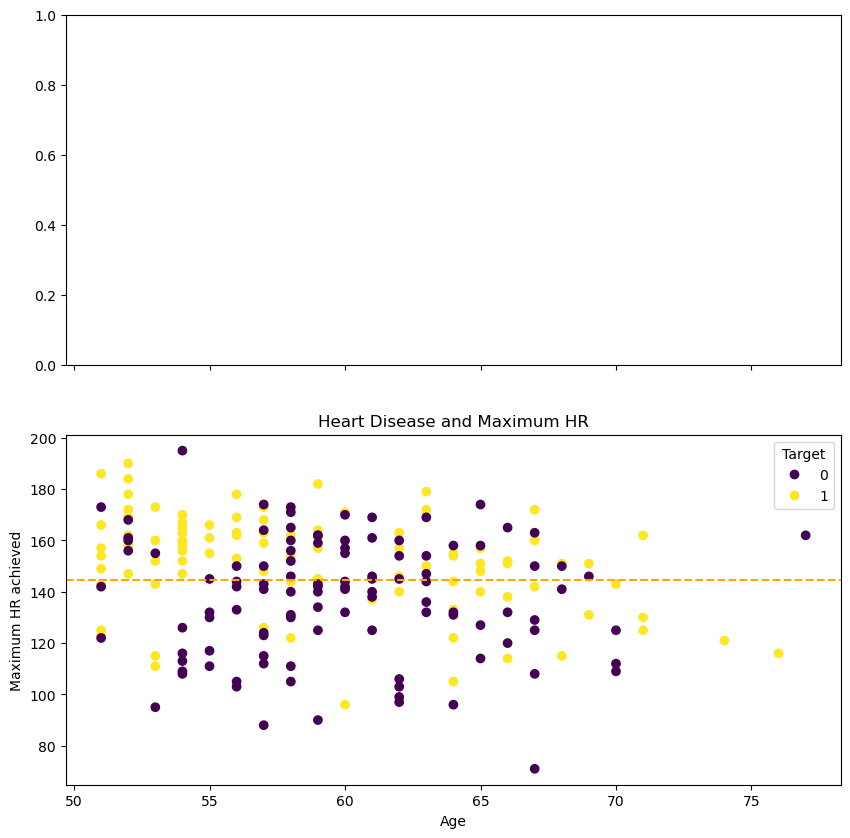

In [84]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(
    figsize=(10, 10),
    nrows=2,
    ncols=1,
    sharex=True
);

# Add data to ax1
scatter = ax1.scatter(
    x=over_50_patients['age'],
    y=over_50_patients['thalach'],
    c=over_50_patients['target']
);

# Customize ax1
ax1.set(
    title="Heart Disease and Maximum HR",
    xlabel="Age",
    ylabel="Maximum HR achieved"
);

# Add a legend for ax1
ax1.legend(*scatter.legend_elements(), title="Target");

# Add a mean line for ax1
ax1.axhline(
    over_50_patients["thalach"].mean(),
    linestyle="--",
    color="orange"
);

In [85]:
# Add data to ax0
scatter = ax0.scatter(
    x=over_50_patients['age'],
    y=over_50_patients['chol'],
    c=over_50_patients['target']
);

# Customize ax0
ax0.set(
    title="Heart Disease and Cholesterol Levels",
    ylabel="Cholesterol"
);

# Add a legend for ax0
ax0.legend(*scatter.legend_elements(), title="Target");

# Add a mean line for ax0
ax0.axhline(
    over_50_patients["chol"].mean(),
    linestyle="--",
    color="orange"
);

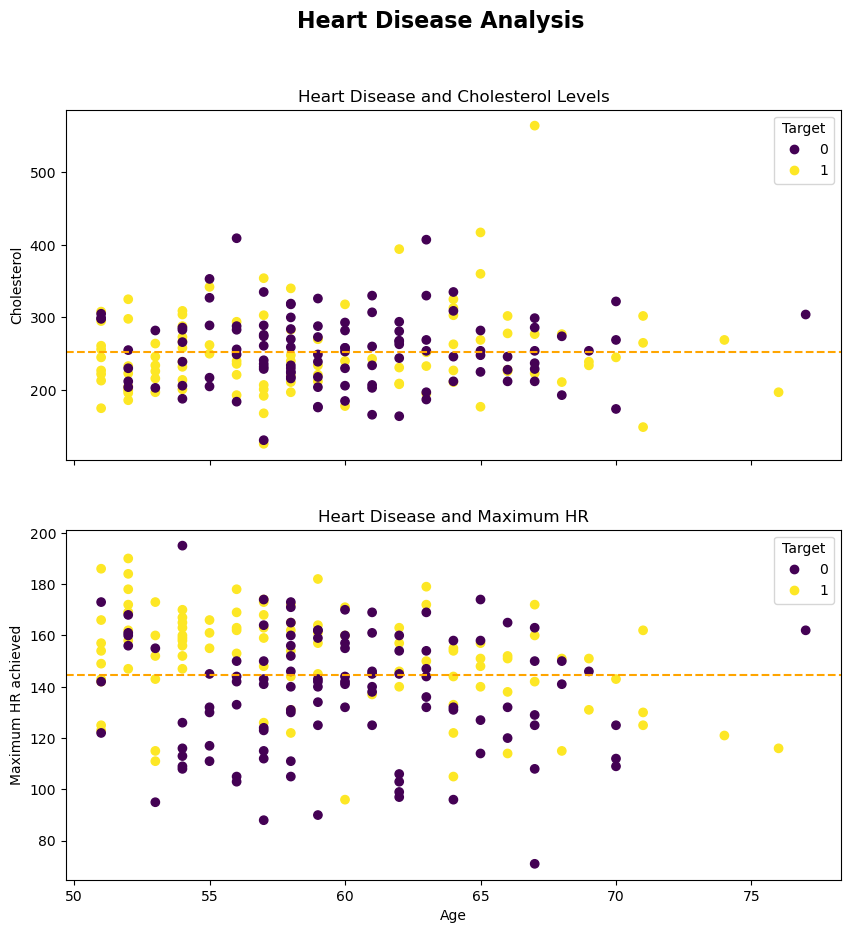

In [88]:
# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");
fig

## Customizing Matplotlib plots and getting stylish

In [152]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

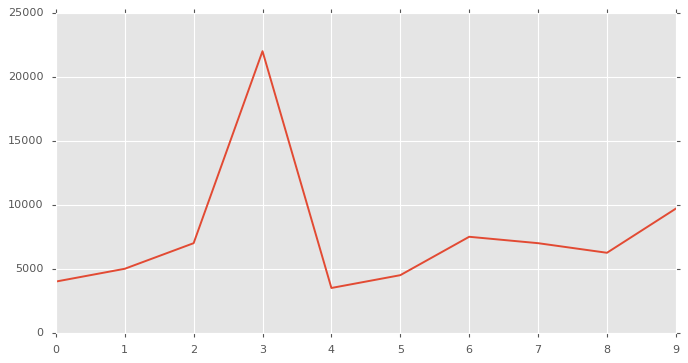

In [170]:
plt.style.use("ggplot");
car_sales["Price"].plot(figsize=(10, 5));

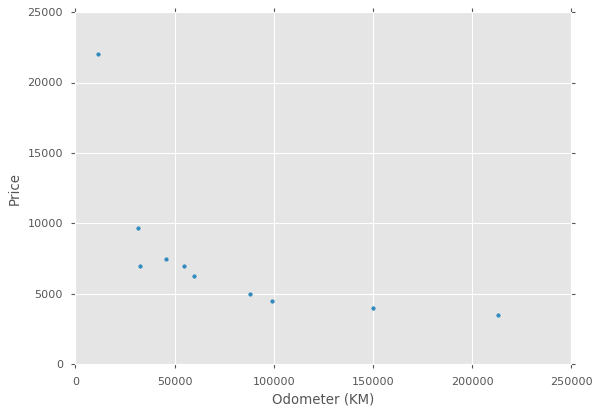

In [154]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [155]:
# Create some data
x = np.random.rand(10, 4)
x

array([[0.16056258, 0.63548861, 0.84734502, 0.16260602],
       [0.58167902, 0.07338048, 0.43962215, 0.66139085],
       [0.85881465, 0.8170424 , 0.41591499, 0.9143039 ],
       [0.9473297 , 0.23237612, 0.10268919, 0.31140515],
       [0.16724708, 0.57046619, 0.81919912, 0.51965994],
       [0.30715916, 0.15152797, 0.19586049, 0.20169778],
       [0.02526415, 0.56788913, 0.50127179, 0.59432955],
       [0.78611488, 0.77231944, 0.933866  , 0.77496025],
       [0.54886905, 0.8628414 , 0.6269639 , 0.67789556],
       [0.09340335, 0.67449581, 0.76962692, 0.43470816]])

In [159]:
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.160563,0.635489,0.847345,0.162606
1,0.581679,0.073380,0.439622,0.661391
2,0.858815,0.817042,0.415915,0.914304
3,0.947330,0.232376,0.102689,0.311405
4,0.167247,0.570466,0.819199,0.519660
5,0.307159,0.151528,0.195860,0.201698
6,0.025264,0.567889,0.501272,0.594330
7,0.786115,0.772319,0.933866,0.774960
8,0.548869,0.862841,0.626964,0.677896
9,0.093403,0.674496,0.769627,0.434708


matplotlib.axes._axes.Axes

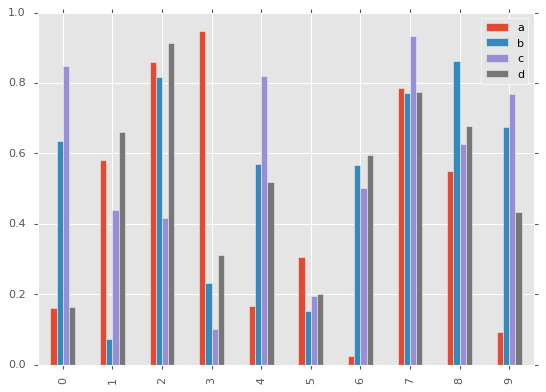

In [160]:
ax = df.plot(kind="bar")
type(ax)

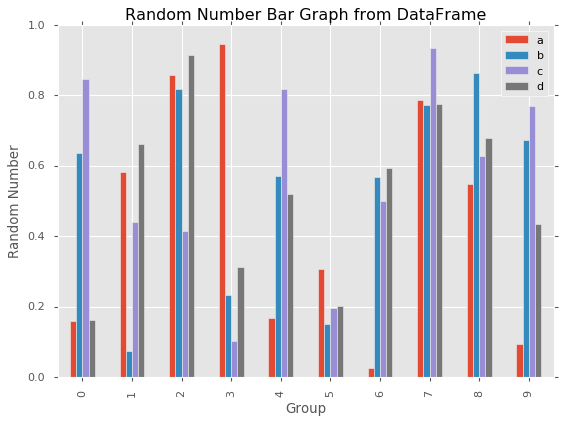

In [164]:
# Customize our plot with set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(
    title="Random Number Bar Graph from DataFrame",
    xlabel="Group",
    ylabel="Random Number"
);
# Make the legend visible
ax.legend().set_visible(True)

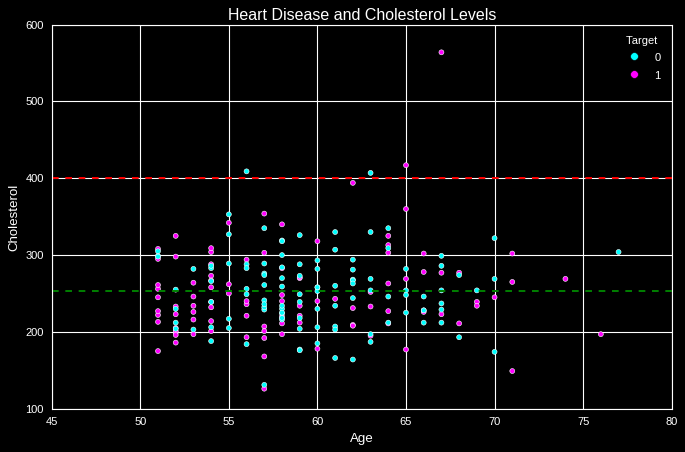

In [186]:
plt.style.use('dark_background')

# The real OO Method, from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(
    x=over_50_patients["age"],
    y=over_50_patients["chol"],
    c=over_50_patients["target"],
    cmap="cool" # this changes the colour schema
);

# Customize the plot
ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholesterol"
);

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(
    over_50_patients["chol"].mean(),
    linestyle="--",
    color="green"
);

ax.axhline(
    400,
    linestyle="--",
    color="red"
);

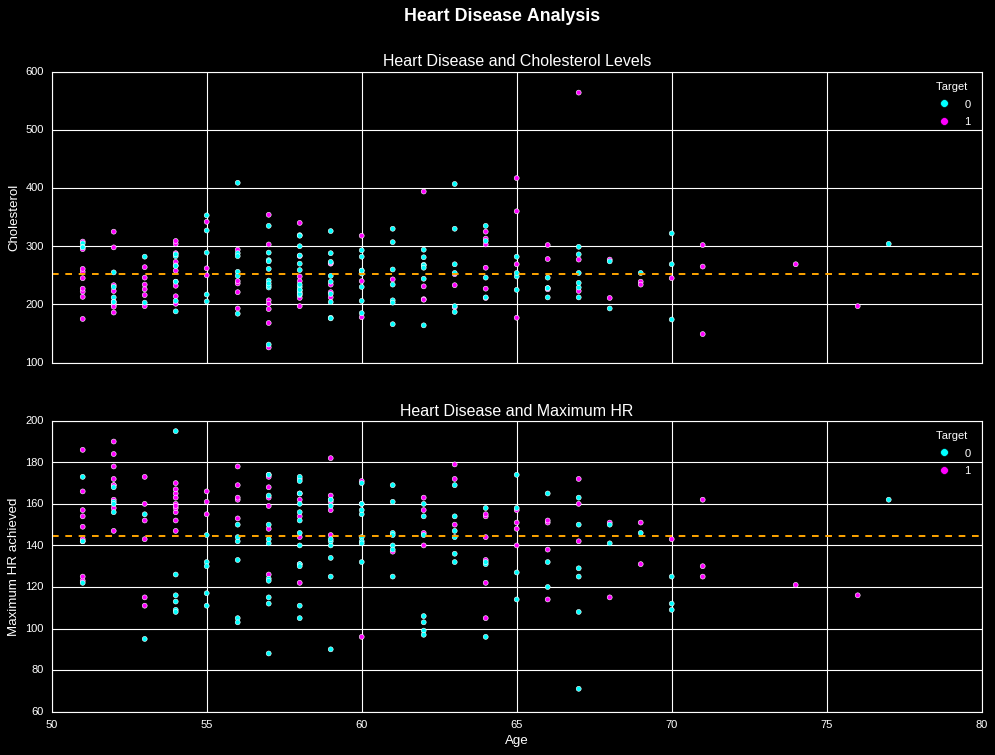

In [198]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(
    figsize=(15, 10),
    nrows=2,
    ncols=1,
    sharex=True
);

# Add data to ax0
scatter = ax0.scatter(
    x=over_50_patients['age'],
    y=over_50_patients['chol'],
    c=over_50_patients['target'],
    cmap="cool"
);

# Customize ax0
ax0.set(
    title="Heart Disease and Cholesterol Levels",
    ylabel="Cholesterol"
);

# Customize x and axis limitations
ax0.set_xlim([50, 80])

# Add a legend for ax0
ax0.legend(*scatter.legend_elements(), title="Target");

# Add a mean line for ax0
ax0.axhline(
    over_50_patients["chol"].mean(),
    linestyle="--",
    color="orange"
);


# Add data to ax1
scatter = ax1.scatter(
    x=over_50_patients['age'],
    y=over_50_patients['thalach'],
    c=over_50_patients['target'],
    cmap="cool"
);

# Customize ax1
ax1.set(
    title="Heart Disease and Maximum HR",
    xlabel="Age",
    ylabel="Maximum HR achieved"
);

ax1.set_ylim([60, 200])

# Add a legend for ax1
ax1.legend(*scatter.legend_elements(), title="Target");

# Add a mean line for ax1
ax1.axhline(
    over_50_patients["thalach"].mean(),
    linestyle="--",
    color="orange"
);

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

In [197]:
fig.savefig("./images/heart-disease-analysis-plot-saved-with-code")